LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

Personal Loan
EMI Free Loan
Personal Overdraft
Advance Salary Loan
This case study will focus on the underwriting process behind Personal Loan only

Problem Statement:

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

Data dictionary:

loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

term : The number of payments on the loan. Values are in months and can be either 36 or 60.

int_rate : Interest Rate on the loan

installment : The monthly payment owed by the borrower if the loan originates.

grade : LoanTap assigned loan grade

sub_grade : LoanTap assigned loan subgrade

emp_title :The job title supplied by the Borrower when applying for the loan.*

emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.

annual_inc : The self-reported annual income provided by the borrower during registration.

verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified

issue_d : The month which the loan was funded

loan_status : Current status of the loan - Target Variable

purpose : A category provided by the borrower for the loan request.

title : The loan title provided by the borrower

dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.

earliest_cr_line :The month the borrower's earliest reported credit line was opened

open_acc : The number of open credit lines in the borrower's credit file.

pub_rec : Number of derogatory public records

revol_bal : Total credit revolving balance

revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

total_acc : The total number of credit lines currently in the borrower's credit file
initial_list_status : The initial listing status of the loan. Possible values are – W, F

application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers

mort_acc : Number of mortgage accounts.

pub_rec_bankruptcies : Number of public record bankruptcies

Address: Address of the individual


Concepts Used :
Exploratory Data Analysis
Feature Engineering
Logistic Regression
Precision Vs Recall Tradeoff

In [1001]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve,auc
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc
    # plot_confusion_matrix, plot_roc_curve
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE


df=pd.read_csv('logistic_regression.csv')
pd.set_option('display.max_columns', None)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [1002]:
#check nulls in the data
df.isnull().sum()/df.shape[0]*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [1003]:
df.shape

(396030, 27)

In [1004]:
#checking the distirbution of loan status and replacing 'Fully Paid' with 1 and 'Charged Off' with 0
print(df['loan_status'].value_counts(normalize=True,sort=True))



loan_status
Fully Paid     0.803871
Charged Off    0.196129
Name: proportion, dtype: float64


~80% of total candidates has fully paid while ~20% have defaulted

In [1005]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [1006]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


#### Correlation Heatmap -

A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. The values of the first dimension appear as the rows of the table while of the second dimension as a column. The color of the cell is proportional to the number of measurements that match the dimensional value. This makes correlation heatmaps ideal for data analysis since it makes patterns easily readable and highlights the differences and variation in the same data. A correlation heatmap, like a regular heatmap, is assisted by a colorbar making data easily readable and comprehensible.

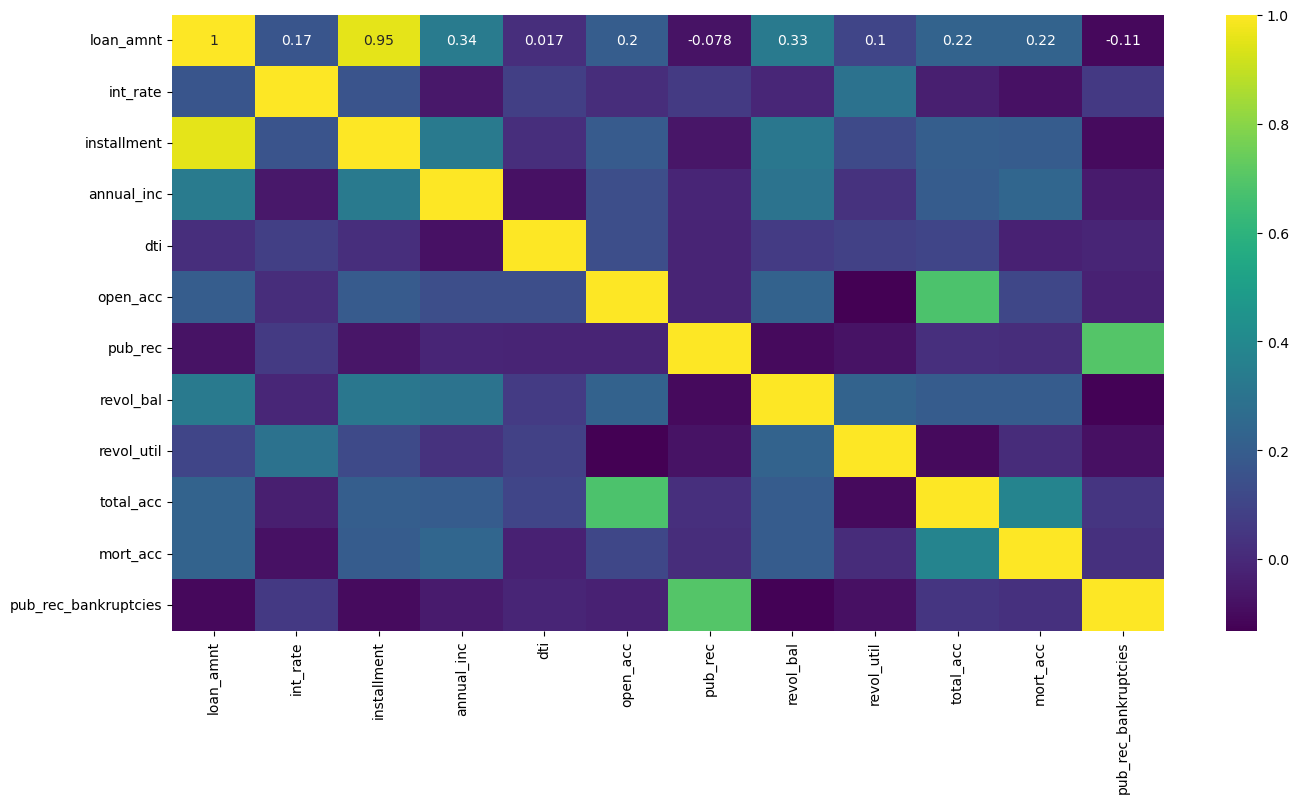

In [1007]:
num_columns=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
    'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
    'pub_rec_bankruptcies']

plt.figure(figsize=(16, 8))
sns.heatmap(df[num_columns].corr(), annot=True, cmap='viridis')
plt.show()

We notice almost perfect correlation between installment and loan amount, which is very obvious as well. Higher the loan amount, higher the installment. Also, there is a decent amount of correlation between pub_rec_backruptcies and pub_rec.
Hence, we can drop one column for both the cases.

In [1008]:
df.drop(columns=['installment','pub_rec_bankruptcies'],inplace=True)

In [1009]:
#checking the stats for paid and defaulted loan in terms of the loan amount
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [1010]:
df['home_ownership'].value_counts()
#majority of people has home ownership as mortgage or rent


home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [1011]:
#combining the minority classes into OTHER
df.loc[(df['home_ownership']=='ANY') | (df['home_ownership']=='NONE'),'home_ownership']='OTHER'
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

In [1012]:
#converting string to datetime format
df['issue_d']=pd.to_datetime(df['issue_d'])
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])


/var/folders/8w/qfs78brj4918m385ryck9h000000gn/T/ipykernel_1254/1161266205.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d']=pd.to_datetime(df['issue_d'])
/var/folders/8w/qfs78brj4918m385ryck9h000000gn/T/ipykernel_1254/1161266205.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])


In [1013]:
df['verification_status'].value_counts()

verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '10+ years'),
  Text(1, 0, '4 years'),
  Text(2, 0, '< 1 year'),
  Text(3, 0, '6 years'),
  Text(4, 0, '9 years'),
  Text(5, 0, '2 years'),
  Text(6, 0, '3 years'),
  Text(7, 0, '8 years'),
  Text(8, 0, '7 years'),
  Text(9, 0, '5 years'),
  Text(10, 0, '1 year')])

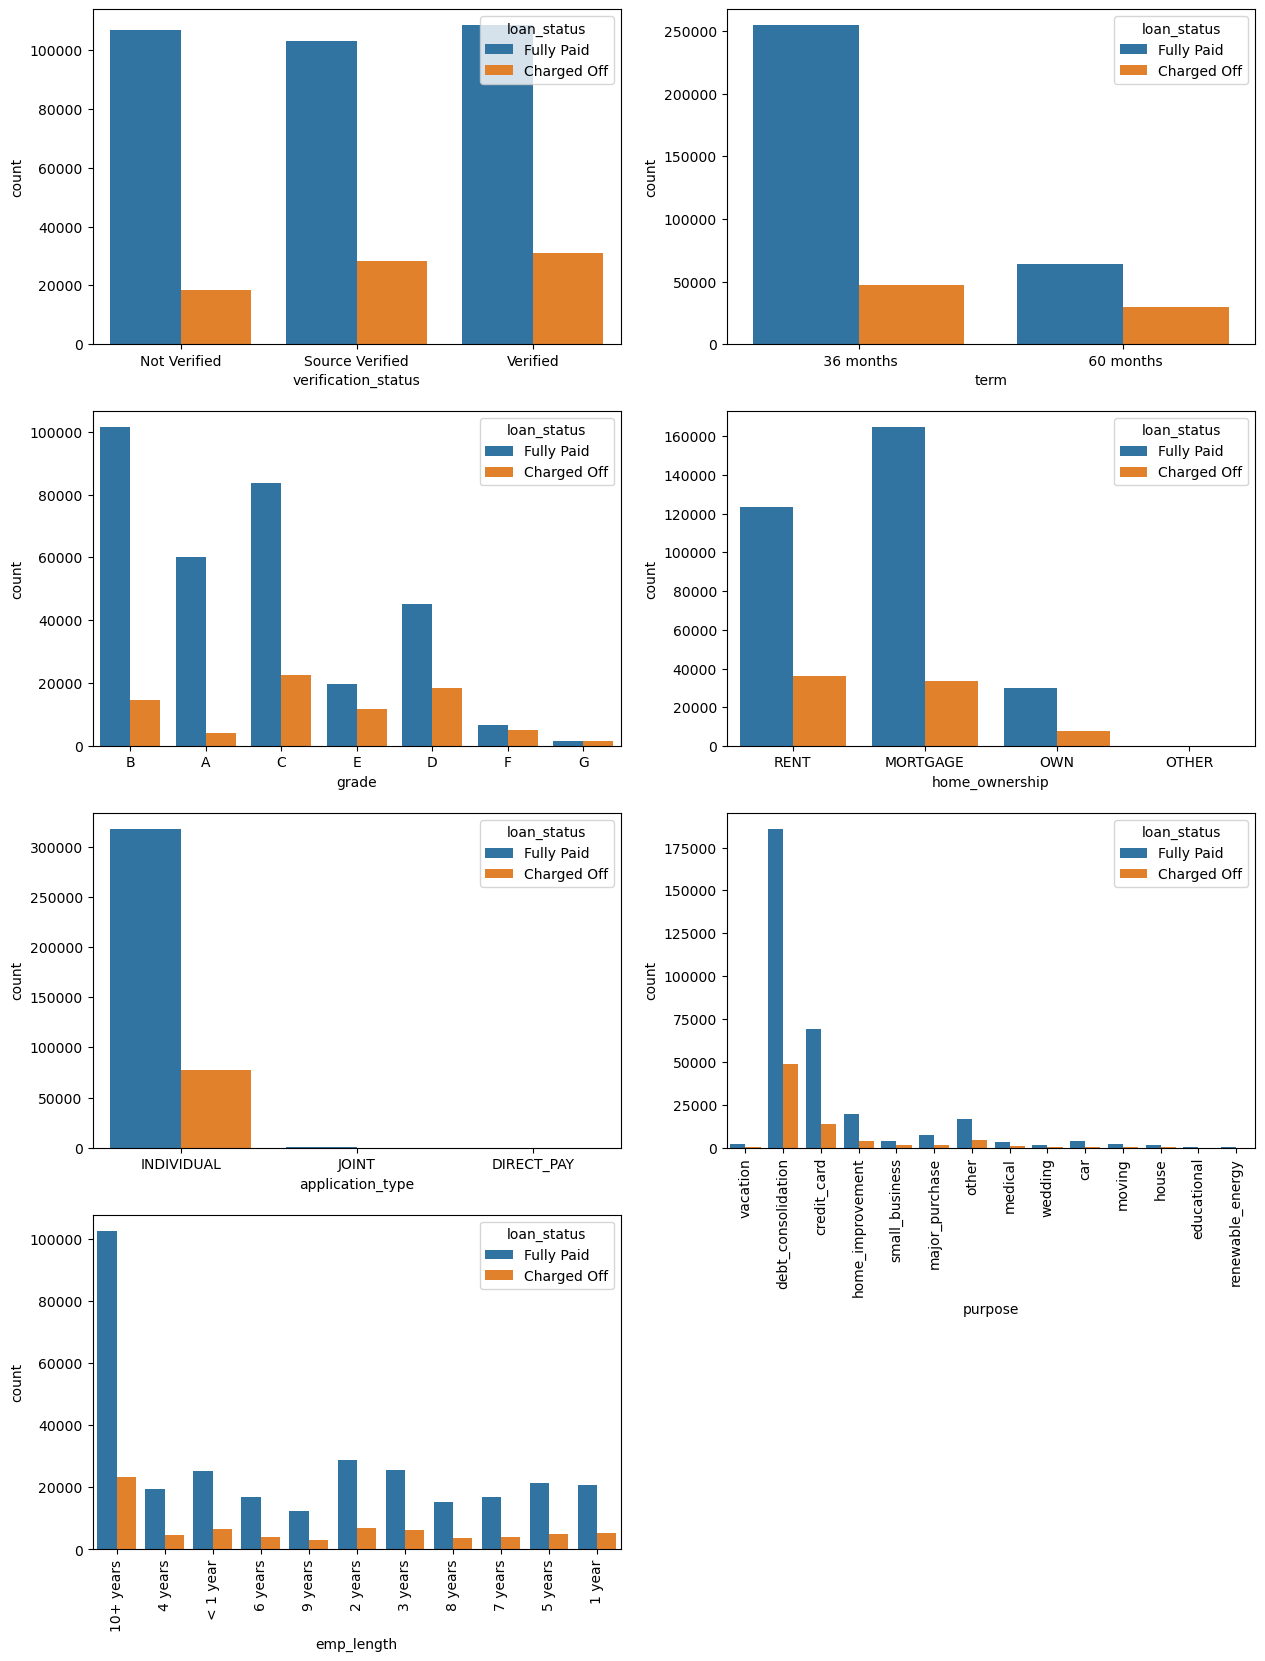

In [1014]:
plt.figure(figsize=(15, 20))


plt.subplot(4, 2, 1)
sns.countplot(data=df,hue='loan_status',x='verification_status')

plt.subplot(4, 2, 2)
sns.countplot(data=df,hue='loan_status',x='term')

plt.subplot(4, 2, 3)
sns.countplot(data=df,hue='loan_status',x='grade')

plt.subplot(4, 2, 4)
sns.countplot(data=df,hue='loan_status',x='home_ownership')

plt.subplot(4, 2, 5)
sns.countplot(data=df,hue='loan_status',x='application_type')


plt.subplot(4, 2, 6)
sns.countplot(data=df,hue='loan_status',x='purpose')
plt.xticks(rotation=90)

plt.subplot(4, 2, 7)
sns.countplot(data=df,hue='loan_status',x='emp_length')
plt.xticks(rotation=90)


Points from above visualisations->

There isn't much relation between verification status and loan status.

Term of loan for majority of fully paid loans is 36 months. 

The top loan grade among the fully paid loans is B

The home ownership owned by most of the fully paid loan individuals- Mortgate and Rent

There is only one application type in the dataset- 'INDIVDUAL'

The top 3 purposes of both kind of sections (fully paid and defaulted) - debt consolidation, credit card, home improvement 

In [1015]:
#top 10 job titles which affored the loan and fully paid
# Teacher, Manager and Registered Nurse are the top 3

df.loc[df['loan_status']=='Fully Paid','emp_title'].value_counts(sort=True)[:10]

emp_title
Teacher             3532
Manager             3321
Registered Nurse    1476
RN                  1467
Supervisor          1425
Project Manager     1259
Sales               1239
Office Manager       970
Driver               961
Owner                954
Name: count, dtype: int64

In [1016]:
#top 10 job titles which defaulted the loan
# Manager,Teacher and Owner are the top 3

df.loc[df['loan_status']=='Charged Off','emp_title'].value_counts(sort=True)[:10]

emp_title
Manager             929
Teacher             857
Owner               456
Supervisor          405
Sales               399
Registered Nurse    380
RN                  379
Driver              378
manager             326
driver              283
Name: count, dtype: int64

### Feature Engineering

In [1017]:

#extracting out state_code and pin_code from the address
temp=df['address'].apply(lambda x: x[-8:])

temp=temp.apply(lambda x: x.split(' '))
df['state_code']=temp.apply(lambda x:x[0])
df['pin_code']=temp.apply(lambda x:x[1])

df.head()


,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,address,state_code,pin_code
0,10000.0,36 months,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,Vacation,26.24,1990-06-01,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",OK,22690
1,8000.0,36 months,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,Debt consolidation,22.05,2004-07-01,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",SD,05113
2,15600.0,36 months,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,Credit card refinancing,12.79,2007-08-01,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",WV,05113
3,7200.0,36 months,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,Credit card refinancing,2.60,2006-09-01,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",MA,00813
4,24375.0,60 months,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,Credit Card Refinance,33.95,1999-03-01,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,"679 Luna Roads\r\nGreggshire, VA 11650",VA,11650


In [1018]:
df.loc[df['loan_status']=='Charged Off','state_code'].value_counts(sort=True)[:10]
#top 10 states with highest count of Charged Off loans


state_code
AP    2873
AE    2763
AA    2711
WY    1443
NV    1425
WV    1417
MS    1414
WI    1402
WA    1394
AK    1390
Name: count, dtype: int64

In [1019]:
df.loc[df['loan_status']=='Fully Paid','state_code'].value_counts(sort=True)[:10]
#top 10 states with highest count of Fully Paid loans

state_code
AP    11435
AE    11394
AA    11208
NJ     5714
LA     5699
NY     5698
WI     5679
VT     5670
MN     5655
VA     5652
Name: count, dtype: int64

In [1020]:
#replacing 1 for paid and 0 for defaulted loans
df['loan_status'].replace({'Fully Paid':0,'Charged Off':1},inplace=True)
df['loan_status'].value_counts()

loan_status
0    318357
1     77673
Name: count, dtype: int64

In [1021]:
#now, let's try to fill the null values in mort_acc column since the percentage is pretty high- ~9%
#As we can see in the heatmap above that mort_acc has the highest correlation with total_acc, hence we will try to perform mean target imputation 
# according to that variable
#We are trying to group by total_acc and find the mean value of mort_acc and then replace the null values in mort_acc
# according to the corresponding mean value.

total_acc_avg=df.groupby(by='total_acc',as_index=False)['mort_acc'].mean()
def fill_mort_na(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg.loc[total_acc_avg['total_acc']==total_acc,'mort_acc']  
    else:
        return mort_acc
    
df['mort_acc']=df.apply(lambda x: fill_mort_na(x['total_acc'],x['mort_acc']),axis=1)
df['mort_acc']=df['mort_acc'].astype(float)
df.isna().sum()/df.shape[0]*100

/var/folders/8w/qfs78brj4918m385ryck9h000000gn/T/ipykernel_1254/1866419667.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df['mort_acc']=df['mort_acc'].astype(float)


loan_amnt              0.000000
term                   0.000000
int_rate               0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              5.789208
emp_length             4.621115
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
title                  0.443401
dti                    0.000000
earliest_cr_line       0.000000
open_acc               0.000000
pub_rec                0.000000
revol_bal              0.000000
revol_util             0.069692
total_acc              0.000000
initial_list_status    0.000000
application_type       0.000000
mort_acc               0.000000
address                0.000000
state_code             0.000000
pin_code               0.000000
dtype: float64

In [1022]:
#dropping the rest of the rows with NA values.

df.dropna(inplace=True)
df.shape



(371125, 27)

In [1023]:
numerical_data = df.select_dtypes(include='number')
num_cols = numerical_data.columns
num_cols

Index(['loan_amnt', 'int_rate', 'annual_inc', 'loan_status', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc'],
      dtype='object')

Outlier Removal

In [1024]:

print(df.shape)
for col in num_cols:
    mean = df[col].mean()
    std = df[col].std()

    upper_limit = mean+3*std
    lower_limit = mean-3*std

    df = df[(df[col]<upper_limit) & (df[col]>lower_limit)]

df.shape

# Three-sigma limits (3-sigma limits) is a statistical calculation that refers to data within three standard deviations from a mean.
# Three-sigma limits are used to set the upper and lower control limits in statistical quality control charts.
# On a bell curve, data that lie above the average and beyond the three-sigma line represent less than 1% of all data points


    

(371125, 27)


(342742, 27)

In [1025]:
#cleaning up term column
print(df['term'].unique())
df['term'].replace({' 36 months': 36,' 60 months':60},inplace=True)
print(df['term'].unique())

[' 36 months' ' 60 months']
[36 60]


In [1026]:
#cleaning up 'initial_list_status' column
print(df['initial_list_status'].unique())
df['initial_list_status'].replace({'w': 0,'f':1},inplace=True)
print(df['initial_list_status'].unique())

['w' 'f']
[0 1]


In [1027]:
#dropping columns which might not be useful in the model
df.drop(columns=['address','application_type','emp_title','sub_grade','title','earliest_cr_line','issue_d','emp_length','state_code'],inplace=True)
df.columns



Index(['loan_amnt', 'term', 'int_rate', 'grade', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'mort_acc', 'pin_code'],
      dtype='object')

In [1028]:

#Creation of Flags- If value greater than 1.0 then 1 else 0. This can be done on:
# 1. Pub_rec
# 2. Mort_acc
def create_flag(x):
    if x==0.0 or x==0:
        return 0
    else:
        return 1

for col in ['pub_rec','mort_acc']:
    df[col]=df[col].apply(lambda x:create_flag(x))


In [1029]:
#one hot encoding on rest of the categorical variables
one_hot_col=['grade','home_ownership','verification_status','purpose','pin_code']

df=pd.get_dummies(df,columns=one_hot_col,drop_first=True,dtype=int)
df.head()
#Now we have got all the columns in numeric data type and we can start training our model

,loan_amnt,term,int_rate,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,pin_code_05113,pin_code_11650,pin_code_22690,pin_code_29597,pin_code_30723,pin_code_48052,pin_code_70466,pin_code_86630,pin_code_93700
0,10000.0,36,11.44,117000.0,0,26.24,16.0,0,36369.0,41.8,25.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,65000.0,0,22.05,17.0,0,20131.0,53.3,27.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,43057.0,0,12.79,13.0,0,11987.0,92.2,26.0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,54000.0,0,2.60,6.0,0,5472.0,21.5,13.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,55000.0,1,33.95,13.0,0,24584.0,69.8,43.0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Data Preparation for Modelling

In [1030]:
y=df['loan_status']
x=df.drop(columns=['loan_status'],axis=1)




In [1031]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.20,random_state=20)



print(x_train.shape)
print(y_test.shape)
print(x_test.shape)

(274193, 45)
(68549,)
(68549, 45)


In [1032]:
#standardisation

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [1033]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('Accuracy score on training data ', model.score(x_train,y_train))
print('Accuracy score on test data ', model.score(x_test,y_test))




Accuracy score on training data  0.891251782503565
Accuracy score on test data  0.8919167310974632


As we can, both the training and test scores are really close and good. So, the model is doing good. 

In [1034]:
confusion_mat=confusion_matrix(y_test,y_pred)
confusion_mat

array([[55044,   313],
       [ 7096,  6096]])

In [1035]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     55357
           1       0.95      0.46      0.62     13192

    accuracy                           0.89     68549
   macro avg       0.92      0.73      0.78     68549
weighted avg       0.90      0.89      0.88     68549



#### ROC Curve -

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate
- False Positive Rate

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

- TPR=(TP)/(TP+FN)

False Positive Rate (FPR) is defined as follows:

- FPR=(FP)/(FP+TN)

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. 

#### AUC (Area under the ROC Curve) -

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).


AUC provides an aggregate measure of performance across all possible classification thresholds. 

In [1036]:
roc_auc=round(roc_auc_score(y_test,model.predict(x_test)),2)
roc_auc


0.73

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


roc auc score:  0.73  (Area under the roc_auc_curve)


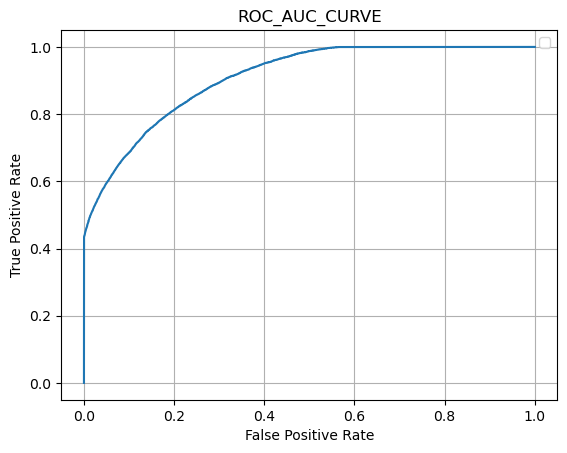

In [1037]:
fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(x_test)[:,1])

plt.plot(fpr, tpr)
print('roc auc score: ',roc_auc,' (Area under the roc_auc_curve)')

plt.xlabel('False Positive Rate'); 
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC_CURVE')
plt.legend(); 
plt.grid()
plt.show()




In [1038]:
precisions, recalls, thresholds = precision_recall_curve(y_test, model.predict_proba(x_test)[:,1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


score:  0.7808656679359327


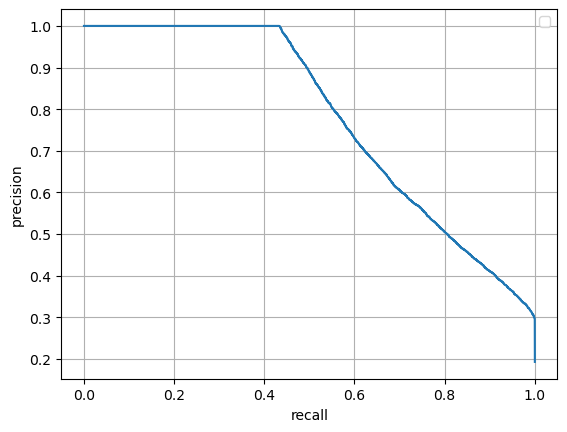

In [1039]:
plt.plot(recalls, precisions)
print('score: ',auc(recalls, precisions) )

plt.xlabel('recall'); 
plt.ylabel('precision')
plt.legend(); 
plt.grid()
plt.show()




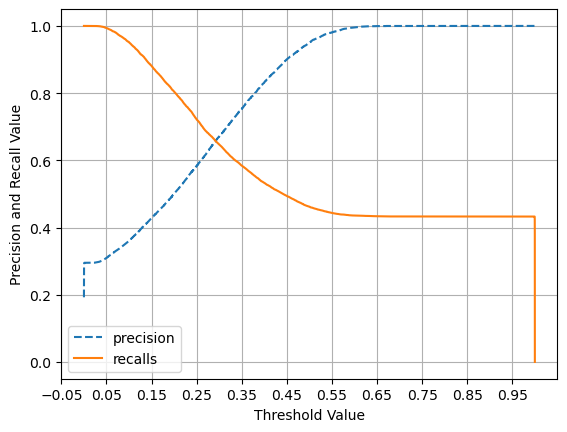

In [1040]:
plt.plot(thresholds, precisions[0:thresholds.shape[0]], linestyle='--', label='precision')
    # plot recall
plt.plot(thresholds, recalls[0:thresholds.shape[0]], label='recalls')

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))

plt.xlabel('Threshold Value'); 
plt.ylabel('Precision and Recall Value')
plt.legend(); 
plt.grid()
plt.show()


### Multicollinearity check using Variance Inflation Factor (VIF) -

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

Multicollinearity can be detected via various methods. One such method is Variance Inflation Factor aka VIF.
In VIF method, we pick each independent feature and regress it against all of the other independent features.
VIF score of an independent variable represents how well the variable is explained by other independent variables.

VIF = 1/1-R2

In [1041]:
def calc_VIF(x):
    VIF             = pd.DataFrame()
    VIF['feature']  = x.columns
    VIF['VIF']      = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return VIF
    # take a look
calc_VIF(x).sort_values(by='VIF',ascending=False)[:5]

,feature,VIF
2,int_rate,102.227915
24,purpose_debt_consolidation,27.559249
1,term,24.665352
5,open_acc,13.799177
9,total_acc,12.364899


VIF value greater than 10 is considered very bad and problematic. So,let's drop all the columns with VIF>10.

In [1042]:
x.drop(columns=['int_rate'],axis=1,inplace=True)
calc_VIF(x).sort_values(by='VIF',ascending=False)[:5]

,feature,VIF
1,term,23.647727
23,purpose_debt_consolidation,22.344135
4,open_acc,13.692322
8,total_acc,12.364867
7,revol_util,9.076963


In [1043]:
x.drop(columns=['term'],axis=1,inplace=True)
calc_VIF(x).sort_values(by='VIF',ascending=False)[:5]

,feature,VIF
22,purpose_debt_consolidation,18.597504
3,open_acc,13.691734
7,total_acc,12.334185
6,revol_util,9.062235
2,dti,8.023971


In [1044]:
x.drop(columns=['purpose_debt_consolidation'],axis=1,inplace=True)
calc_VIF(x).sort_values(by='VIF',ascending=False)[:5]

,feature,VIF
3,open_acc,13.144228
7,total_acc,12.308888
6,revol_util,8.348598
1,annual_inc,7.669328
2,dti,7.616281


In [1045]:
x.drop(columns=['open_acc'],axis=1,inplace=True)
calc_VIF(x).sort_values(by='VIF',ascending=False)[:5]

,feature,VIF
5,revol_util,8.041756
6,total_acc,7.892030
1,annual_inc,7.567916
2,dti,7.068421
0,loan_amnt,6.714966


We are good now!!


In [1047]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.20,random_state=20)

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.8908214287016809
0.8912019139593576


Model is actually doing slightly better on the test data

In [1053]:
x = scaler.fit_transform(x)

kfold = KFold(n_splits=5)
accuracy = np.mean(cross_val_score(model, x, y, cv=kfold, scoring='accuracy', n_jobs=-1))
print("Cross Validation accuracy: {:.3f}".format(accuracy))

Cross Validation accuracy: 0.891


In [1051]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     55357
           1       0.96      0.45      0.62     13192

    accuracy                           0.89     68549
   macro avg       0.92      0.72      0.78     68549
weighted avg       0.90      0.89      0.87     68549

